In [217]:
#import packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [218]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [219]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle

In [220]:
#import dataset 
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [221]:
#view top few rows
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [222]:
#check for null values, data type for each column, number of entries and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [223]:
#dropping _c39 column
df.drop(columns=['_c39'],inplace=True)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


### Exploratory Data Analysis

In [224]:
#check value count for each column so that we get unique values with their number of occurances.
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

In [225]:
#dropping policy_number, policy_bind_date, incident_date, incident_location column
df.drop(columns=['policy_number','policy_bind_date','incident_date','incident_location'],inplace=True)
# dropping auto_model too as it has 30+ unique values
df.drop(columns=['auto_model'],inplace=True)

#### Univariate Analysis

In [226]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [227]:
#spliting the columns into two categories for further analysis
numerical_col=['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit','insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim','auto_year']
categorical_col=['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'fraud_reported']

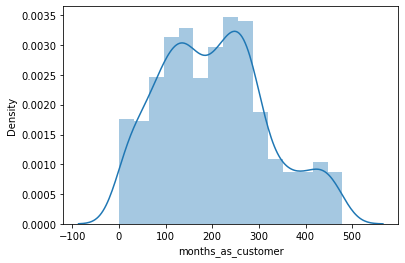

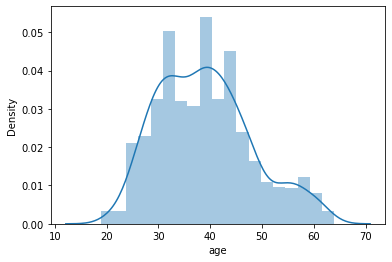

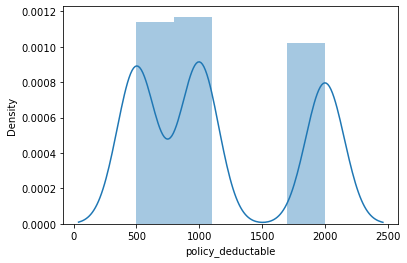

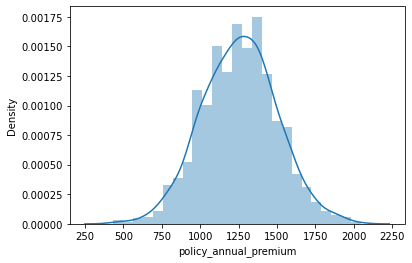

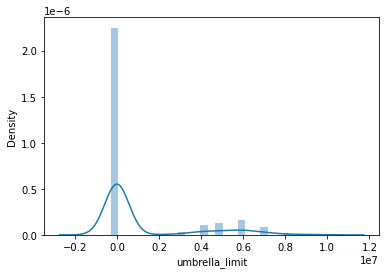

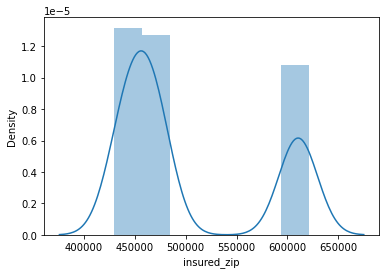

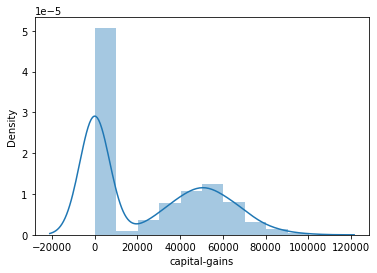

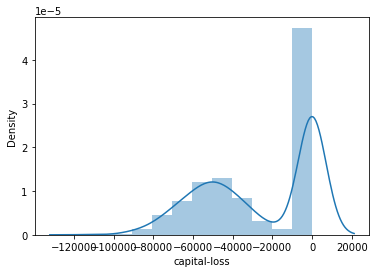

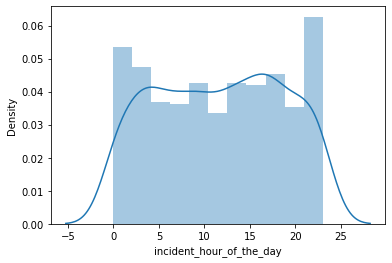

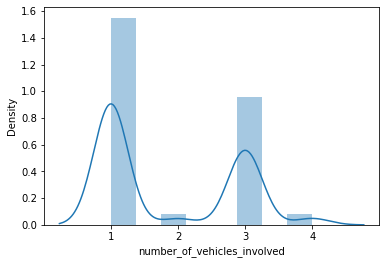

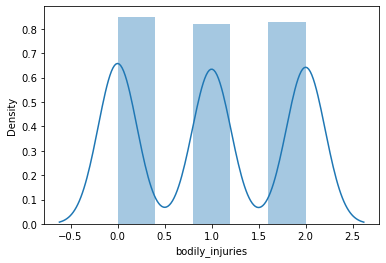

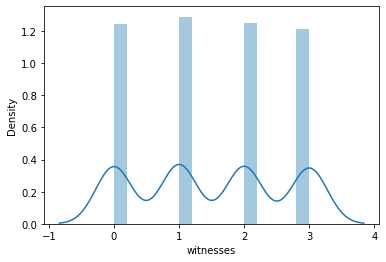

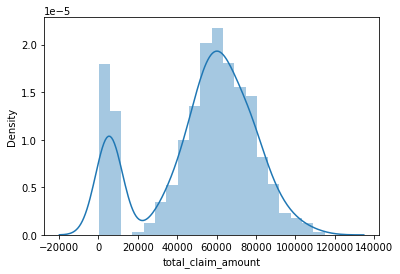

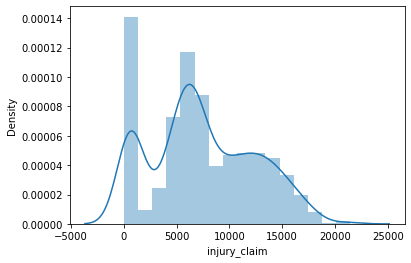

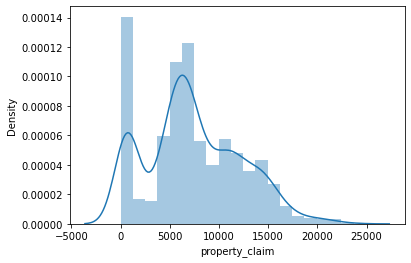

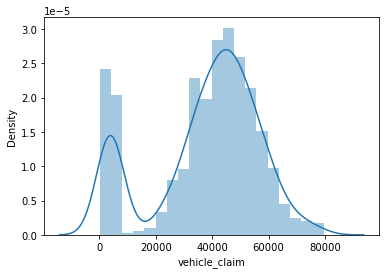

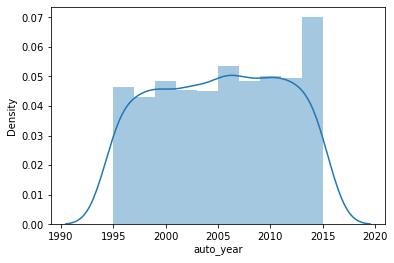

In [228]:
#Display distribution for all numerical columns.
for i in numerical_col:
    sns.distplot(df[i])
    plt.show()

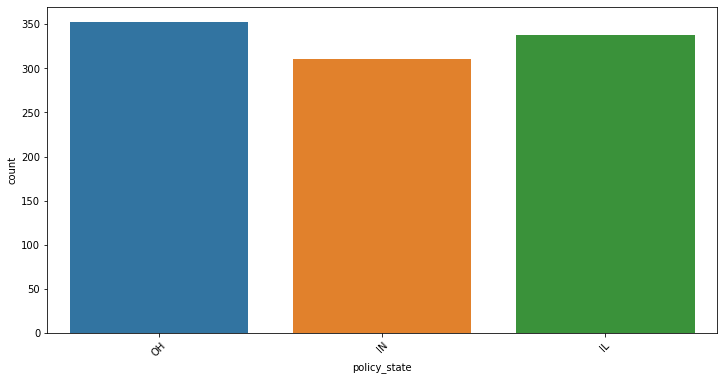

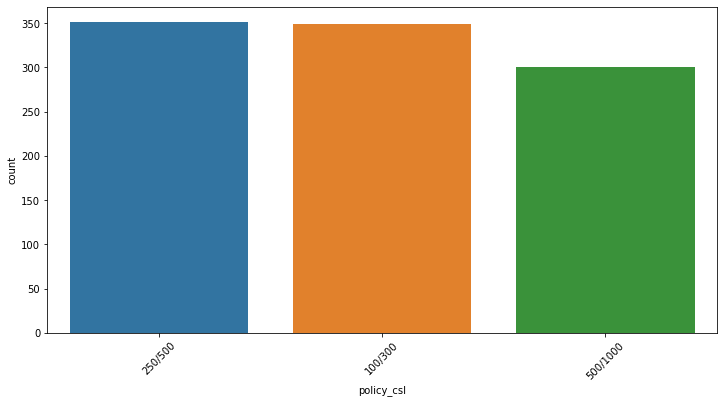

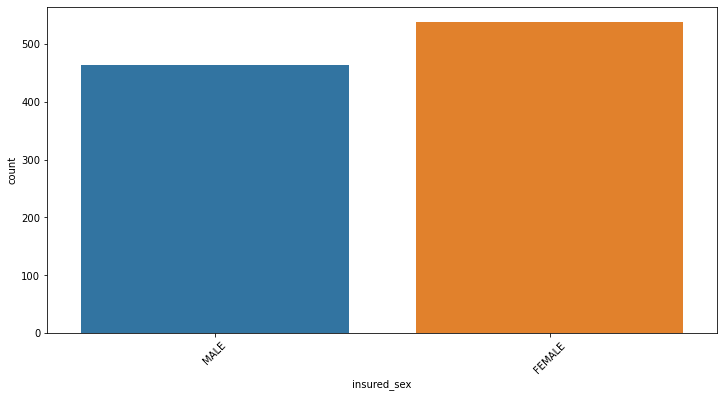

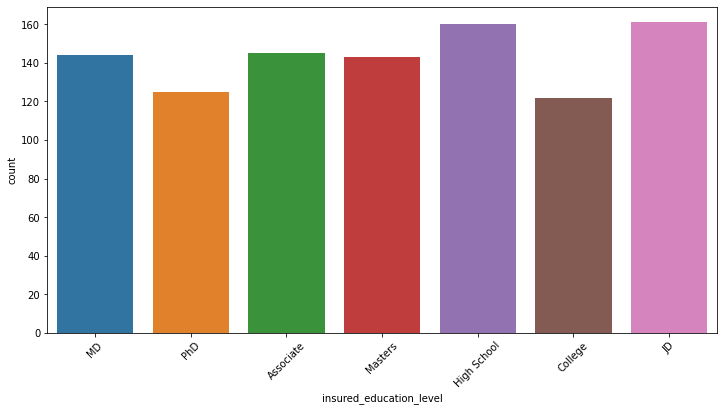

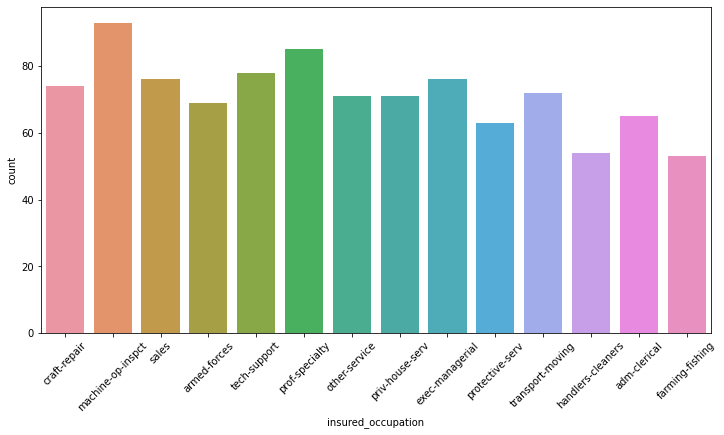

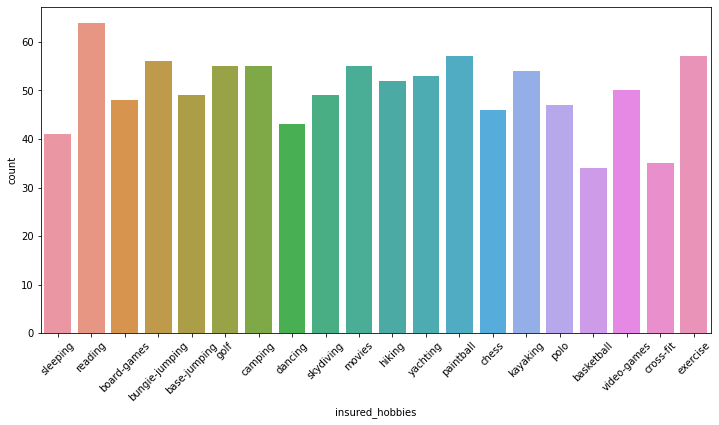

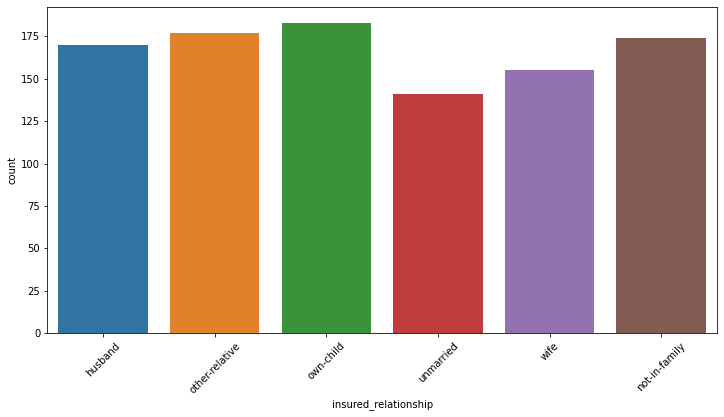

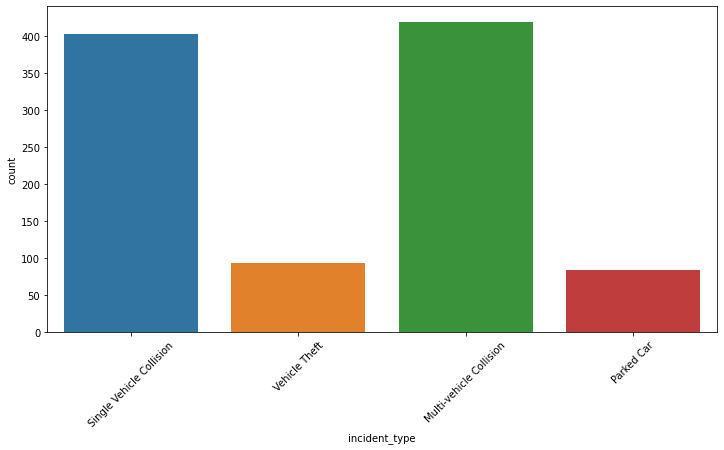

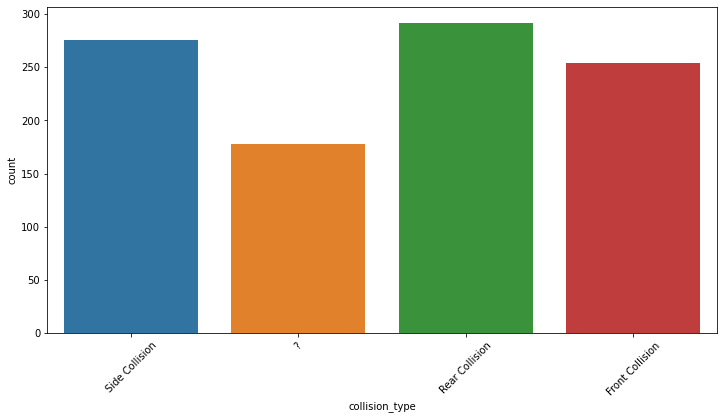

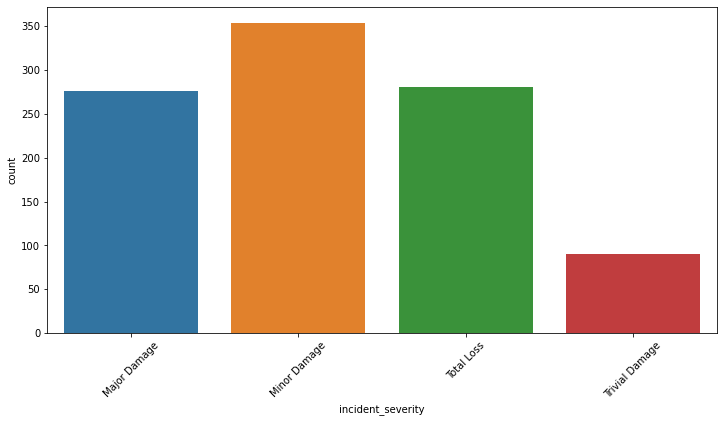

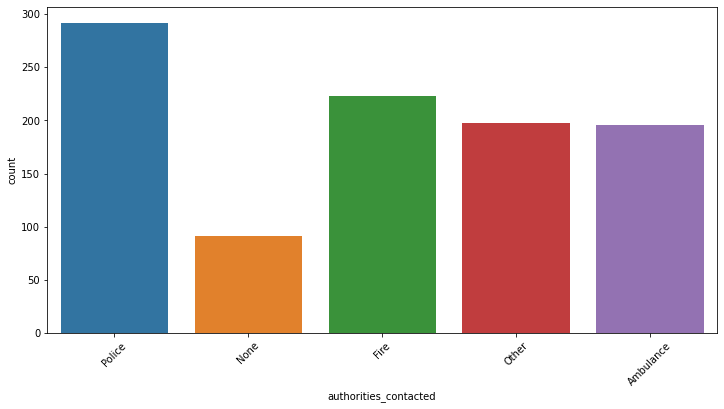

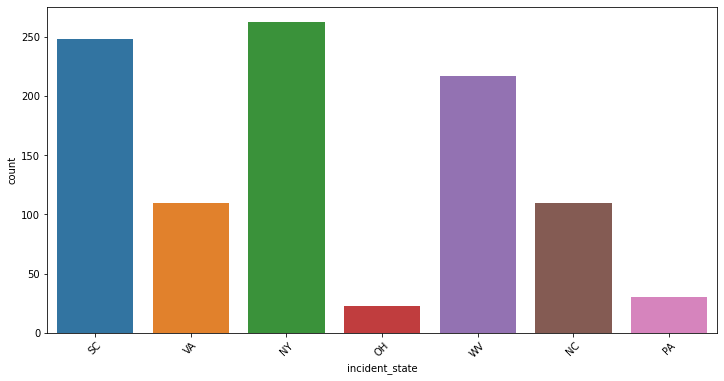

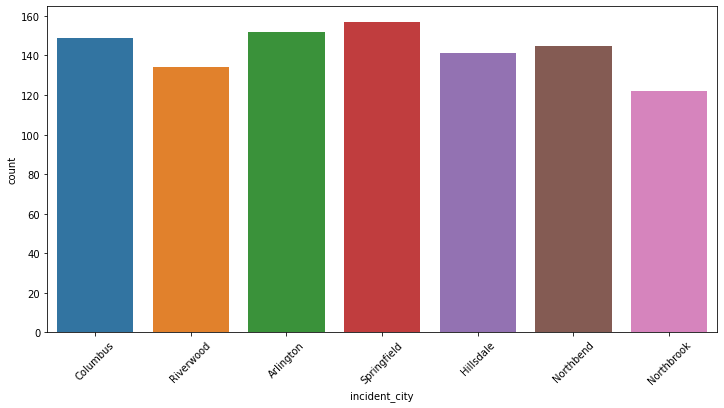

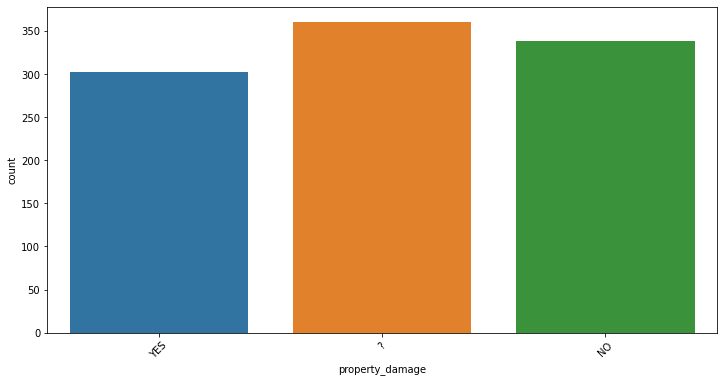

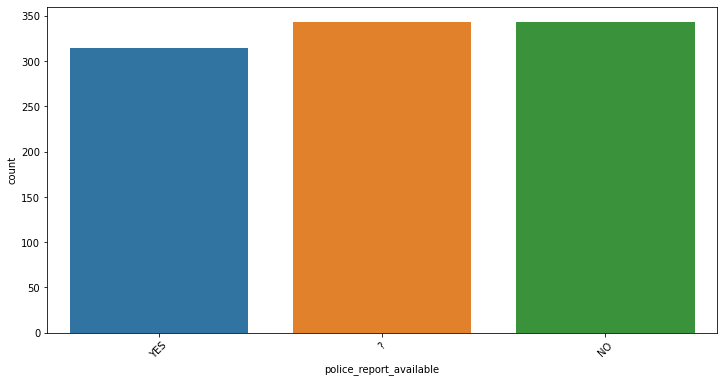

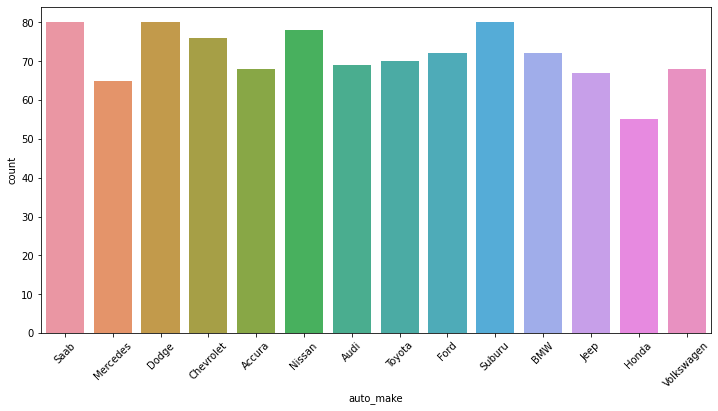

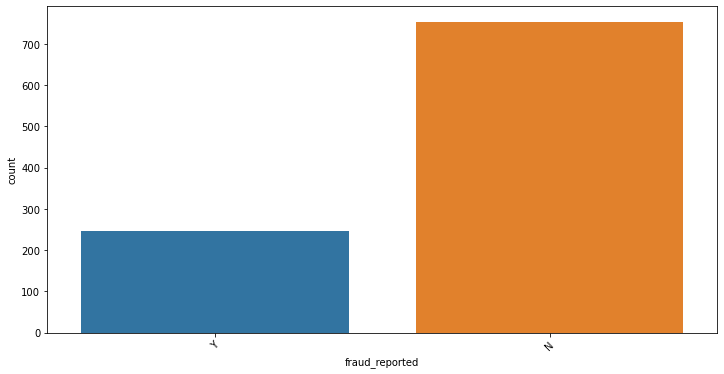

In [229]:
#Display value_counts of all categorical columns 
for i in categorical_col:
    plt.figure(figsize=(12,6))
    sns.countplot(df[i])
    plt.xticks(rotation=45)
    plt.show()

#### Bivariate Analysis

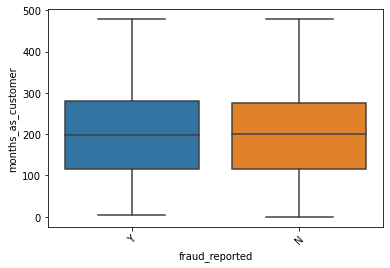

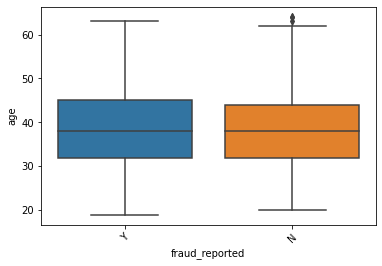

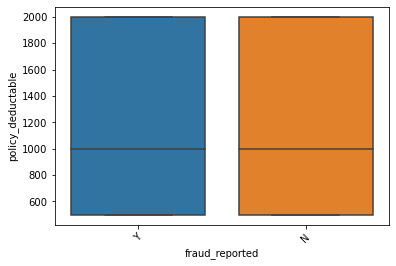

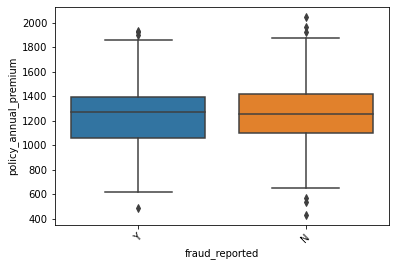

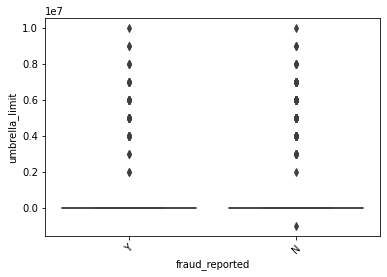

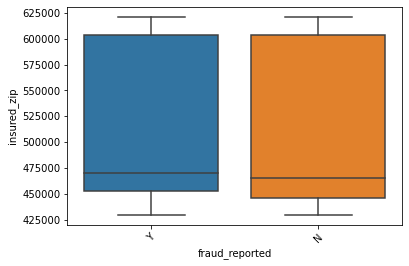

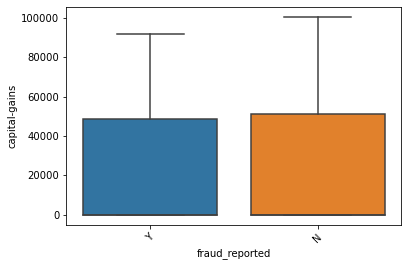

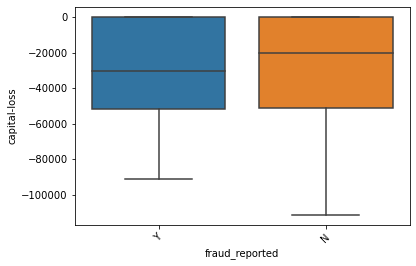

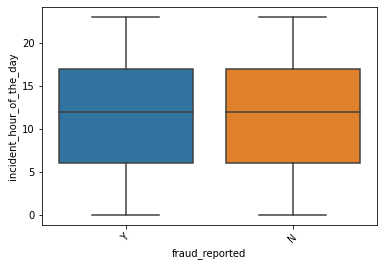

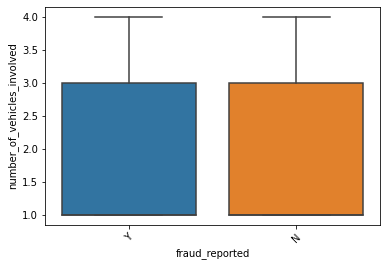

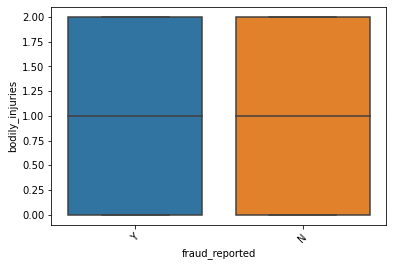

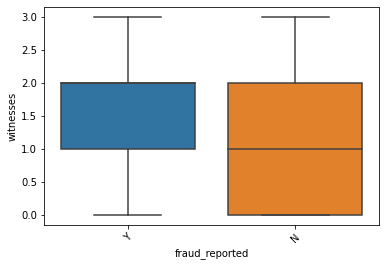

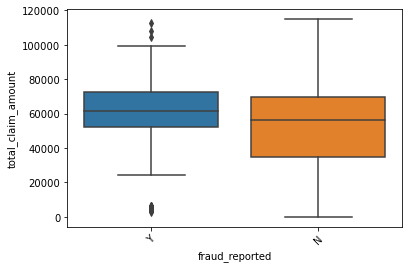

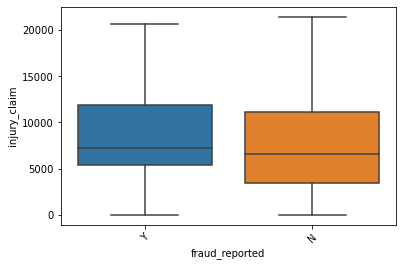

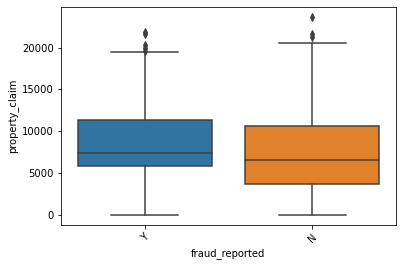

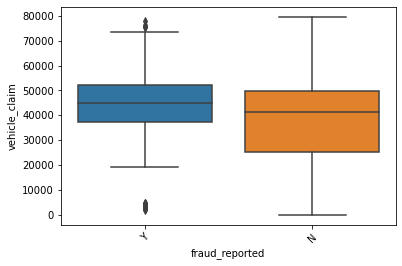

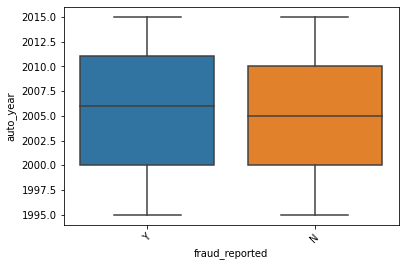

In [230]:
#For all numerical columns compare the value ranges for fraud_reported
for i in numerical_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['fraud_reported'],y=df[i])
    plt.xticks(rotation=45)
    plt.show()

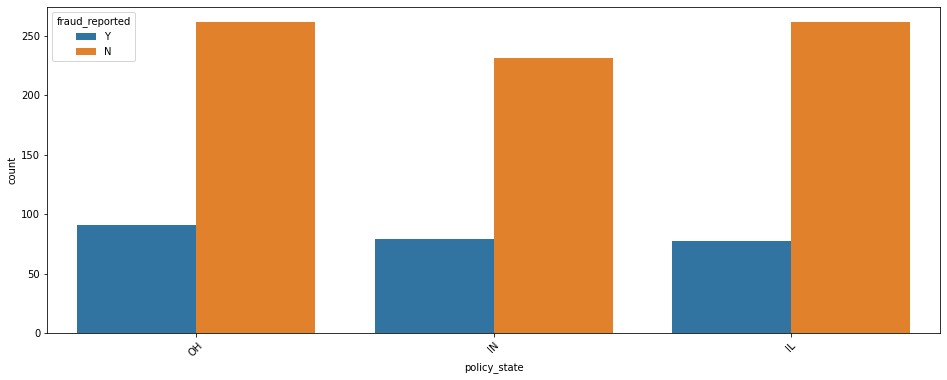

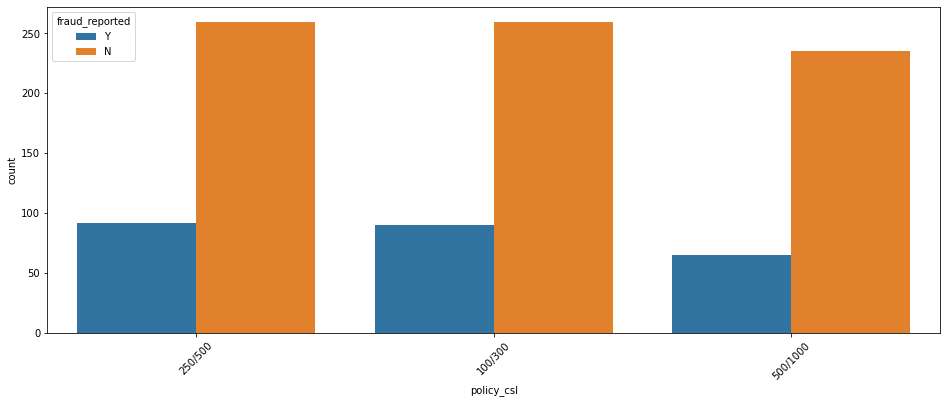

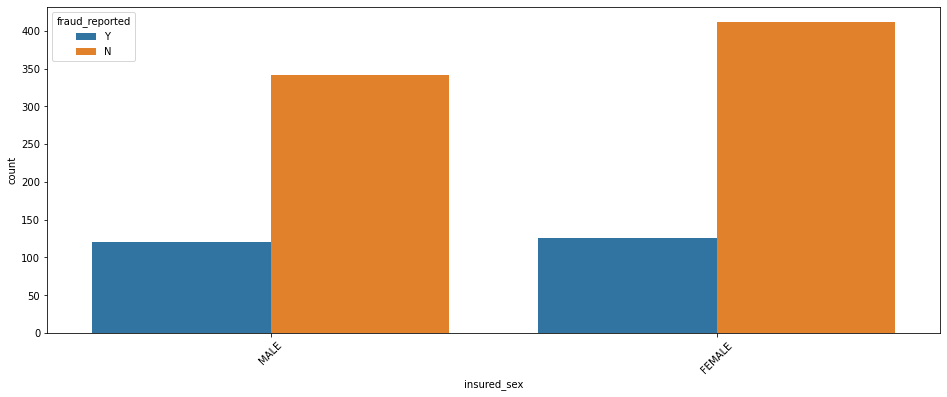

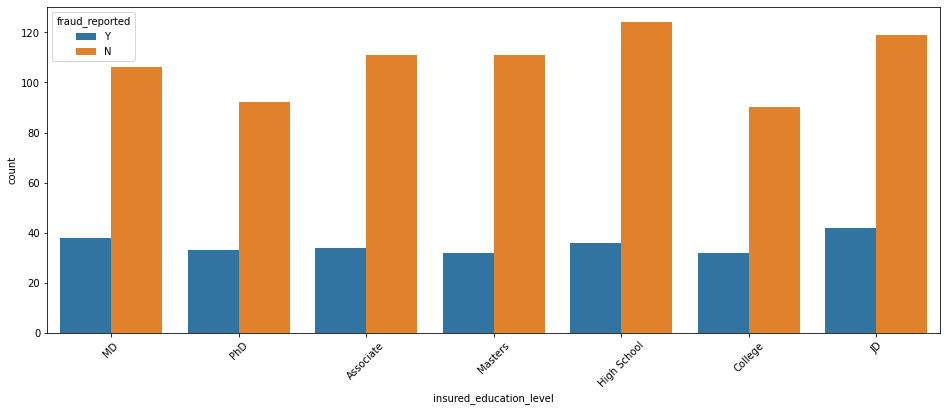

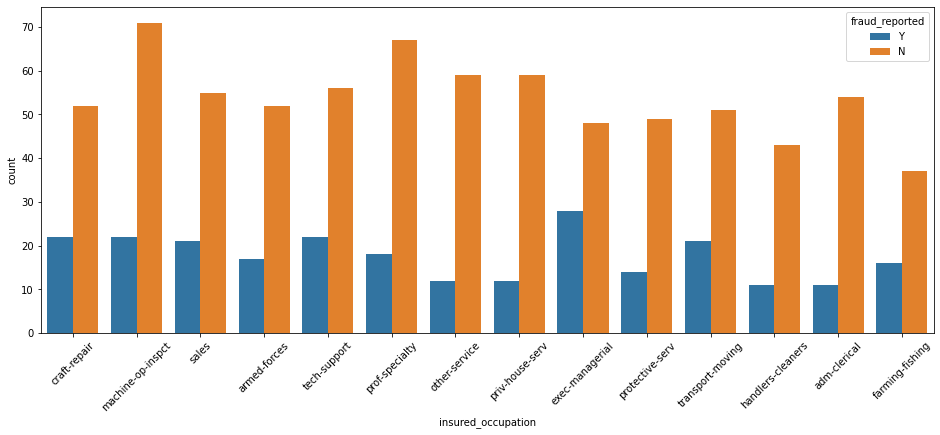

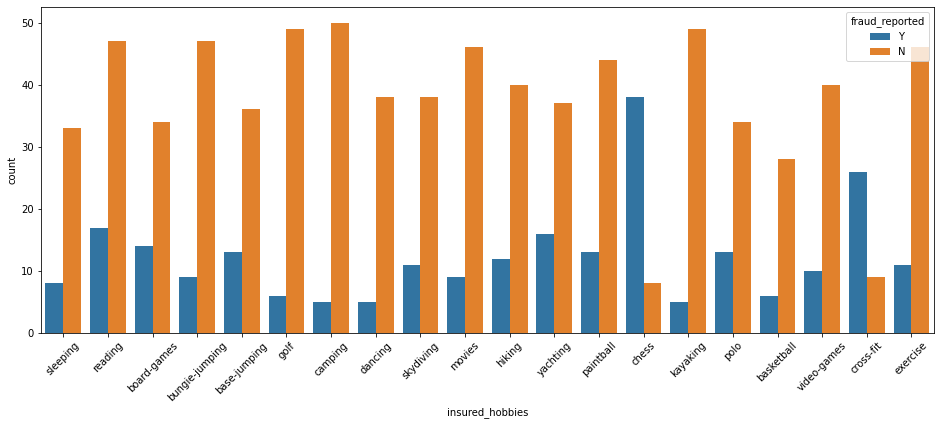

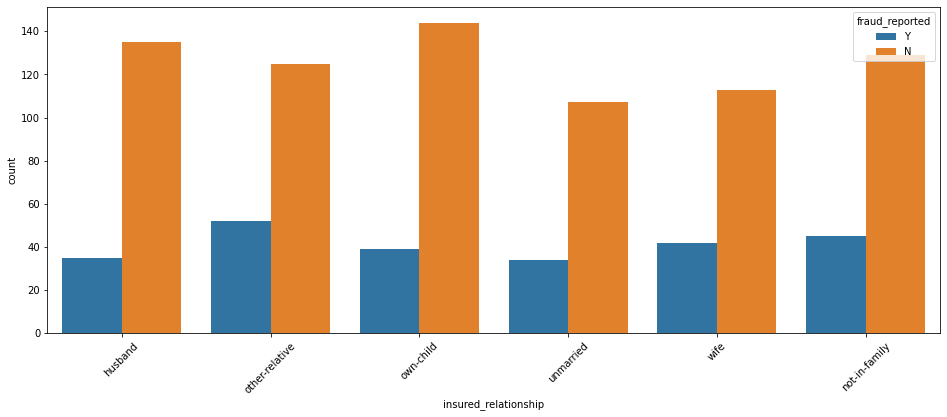

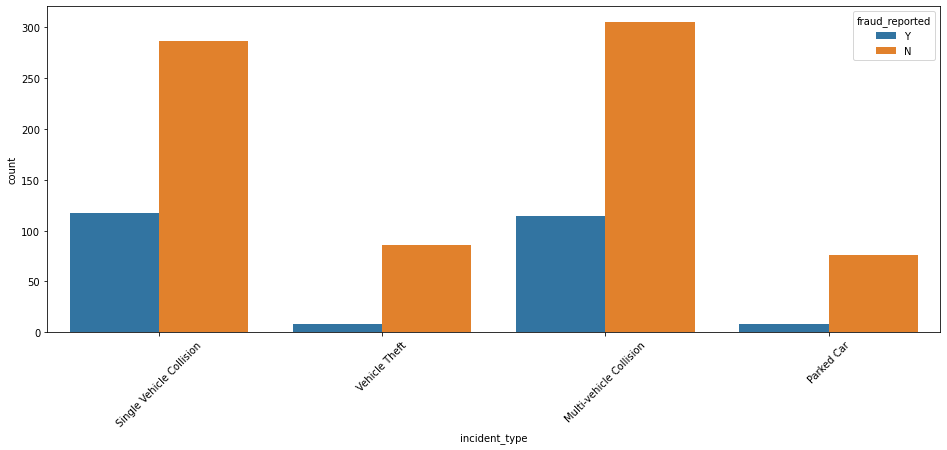

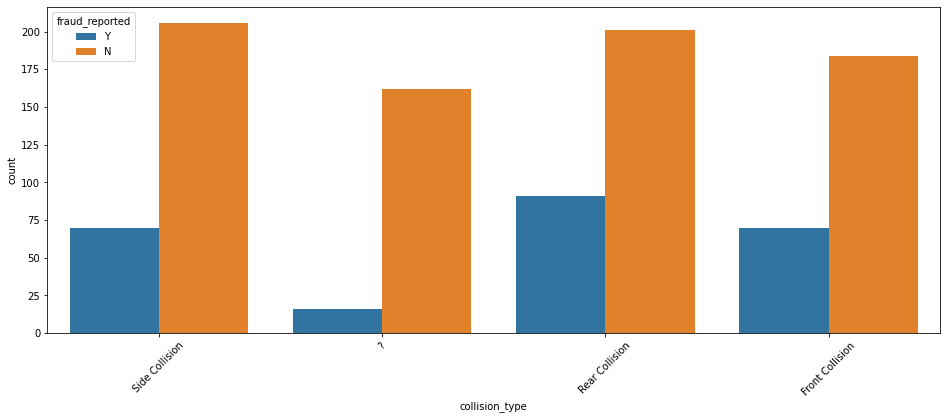

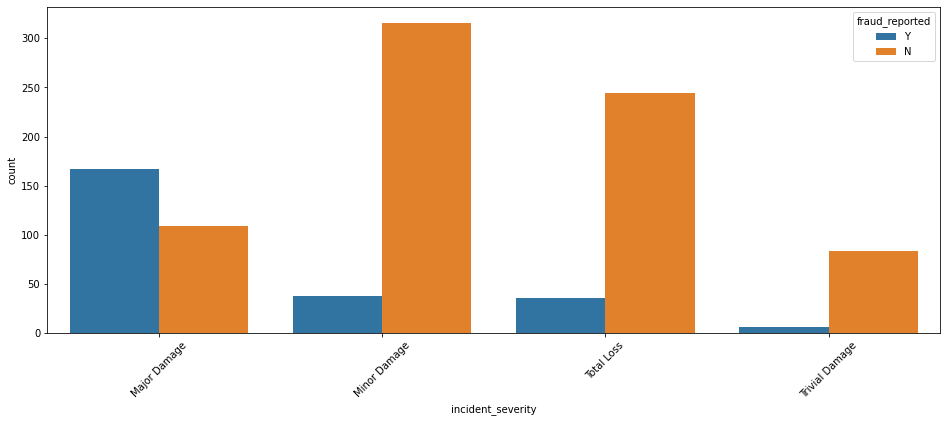

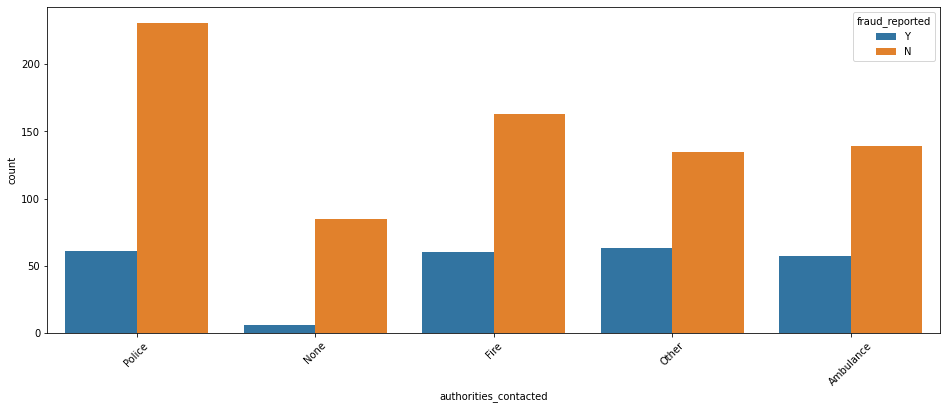

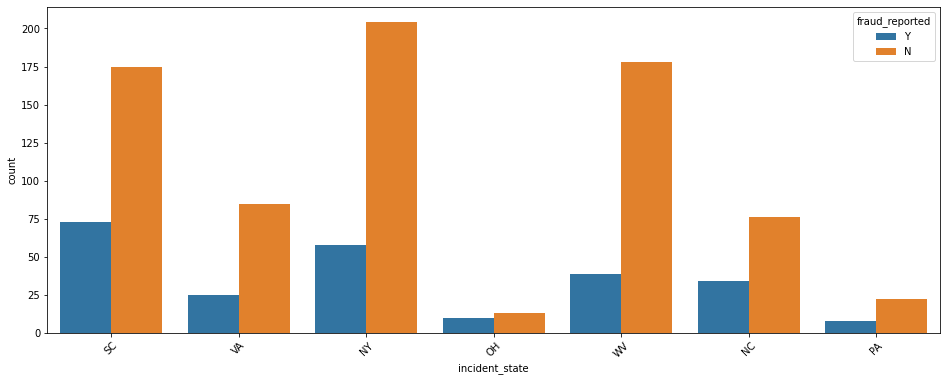

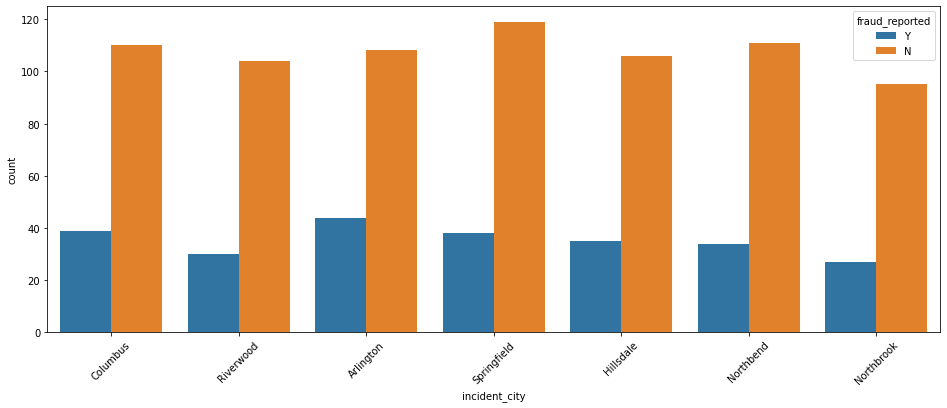

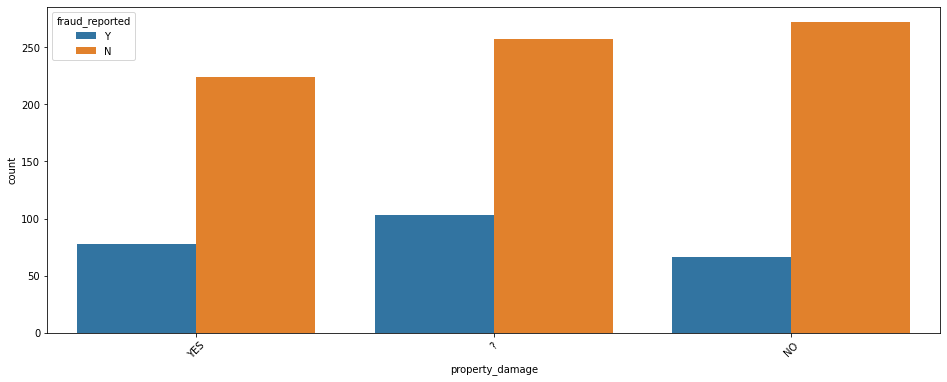

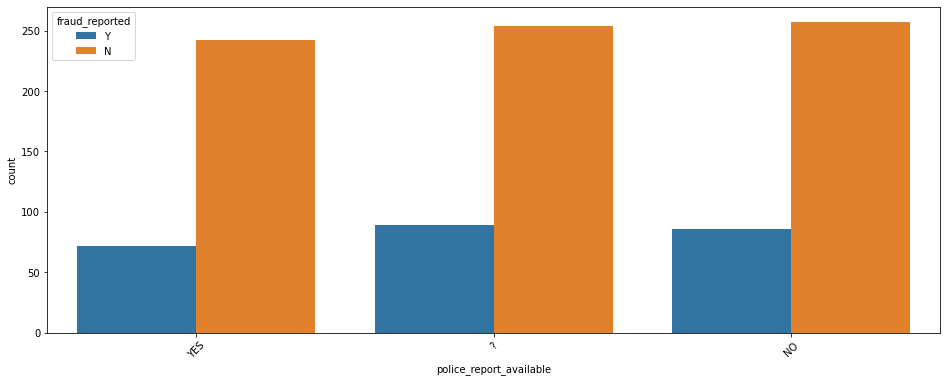

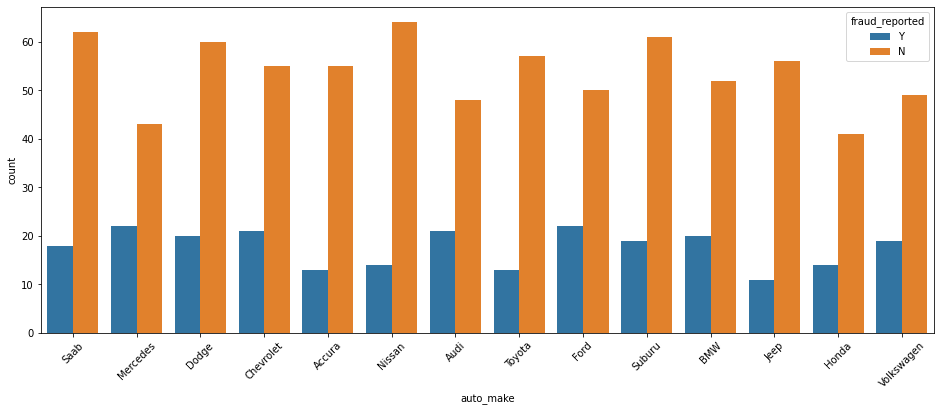

In [231]:
# for all categorical columns check how the fraud_reported vary
for i in categorical_col[:-1]:
    plt.figure(figsize=(16,6))
    sns.countplot(hue=df['fraud_reported'],x=df[i])
    plt.xticks(rotation=45)
    plt.show()

#### Multivariate Analysis

<AxesSubplot:>

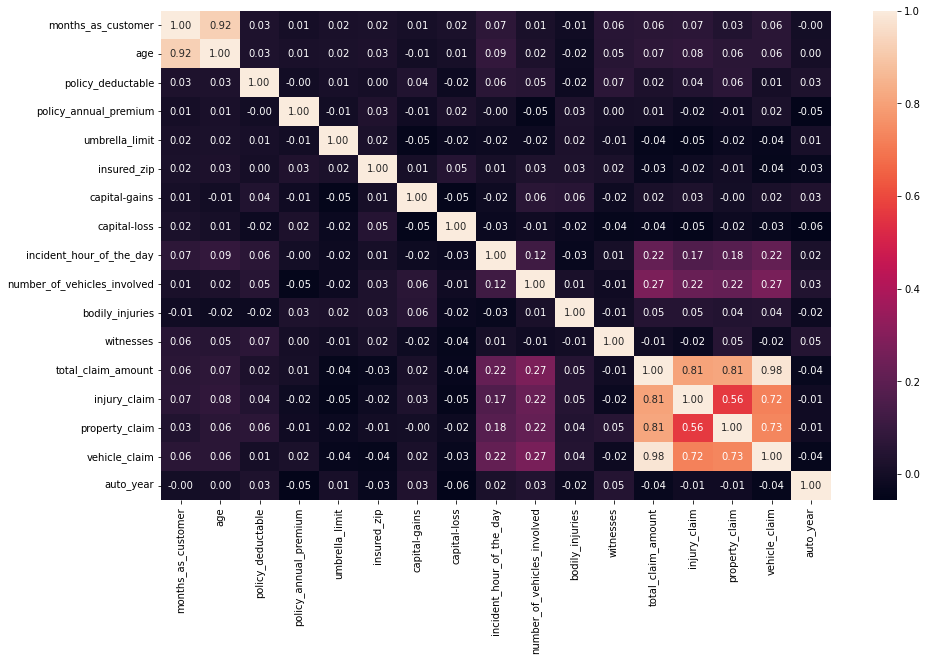

In [232]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True, fmt=".2f")

### Feature Engineering

In [233]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [234]:
#converting categorical features (apart from target variable) to numerical values
categorical_col

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'fraud_reported']

In [235]:
# converting insured_sex column value to 0 and 1
df['insured_sex']=df['insured_sex'].map({'FEMALE':0,'MALE':1})

In [236]:
#one hot encoding of the categoriacal columns
dfpolicy_state=pd.get_dummies(df['policy_state'],prefix="policy_state")
dfpolicy_csl=pd.get_dummies(df['policy_csl'],prefix="policy_csl")
dfinsured_education_level=pd.get_dummies(df['insured_education_level'],prefix="insured_education_level")
dfinsured_occupation=pd.get_dummies(df['insured_occupation'],prefix="insured_occupation")
dfinsured_hobbies=pd.get_dummies(df['insured_hobbies'],prefix="insured_hobbies")
dfinsured_relationship=pd.get_dummies(df['insured_relationship'],prefix="insured_relationship")
dfincident_type=pd.get_dummies(df['incident_type'],prefix="incident_type")
dfcollision_type=pd.get_dummies(df['collision_type'],prefix="collision_type")
dfincident_severity=pd.get_dummies(df['incident_severity'],prefix="incident_severity")
dfauthorities_contacted=pd.get_dummies(df['authorities_contacted'],prefix="authorities_contacted")
dfincident_state=pd.get_dummies(df['incident_state'],prefix="incident_state")
dfincident_city=pd.get_dummies(df['incident_city'],prefix="incident_city")
dfproperty_damage=pd.get_dummies(df['property_damage'],prefix="property_damage")
dfpolice_report_available=pd.get_dummies(df['police_report_available'],prefix="police_report_available")
dfauto_make=pd.get_dummies(df['auto_make'],prefix="auto_make")
#dfauto_model=pd.get_dummies(df['auto_model'],prefix="auto_model")

In [237]:
# Concatenate the original dataframe with dataframes created
df=pd.concat([df,dfpolicy_state],axis=1)
df=pd.concat([df,dfpolicy_csl],axis=1)
df=pd.concat([df,dfinsured_education_level],axis=1)
df=pd.concat([df,dfinsured_occupation],axis=1)
df=pd.concat([df,dfinsured_hobbies],axis=1)
df=pd.concat([df,dfinsured_relationship],axis=1)
df=pd.concat([df,dfincident_type],axis=1)
df=pd.concat([df,dfcollision_type],axis=1)
df=pd.concat([df,dfincident_severity],axis=1)
df=pd.concat([df,dfauthorities_contacted],axis=1)
df=pd.concat([df,dfincident_state],axis=1)
df=pd.concat([df,dfincident_city],axis=1)
df=pd.concat([df,dfproperty_damage],axis=1)
df=pd.concat([df,dfpolice_report_available],axis=1)
df=pd.concat([df,dfauto_make],axis=1)
#df=pd.concat([df,dfauto_model],axis=1)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,48,OH,250/500,1000,1406.91,0,466132,1,MD,...,0,0,0,0,0,0,1,0,0,0
1,228,42,IN,250/500,2000,1197.22,5000000,468176,1,MD,...,0,0,0,0,1,0,0,0,0,0
2,134,29,OH,100/300,2000,1413.14,5000000,430632,0,PhD,...,1,0,0,0,0,0,0,0,0,0
3,256,41,IL,250/500,2000,1415.74,6000000,608117,0,PhD,...,0,0,0,0,0,0,0,0,0,0
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,1,Associate,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,0,Masters,...,0,0,1,0,0,0,0,0,0,0
996,285,41,IL,100/300,1000,1436.79,0,608177,0,PhD,...,0,0,0,0,0,0,0,0,0,1
997,130,34,OH,250/500,500,1383.49,3000000,442797,0,Masters,...,0,0,0,0,0,0,0,1,0,0
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,1,Associate,...,0,0,0,0,0,0,0,0,0,0


In [238]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       ...
       'auto_make_Dodge', 'auto_make_Ford', 'auto_make_Honda',
       'auto_make_Jeep', 'auto_make_Mercedes', 'auto_make_Nissan',
       'auto_make_Saab', 'auto_make_Suburu', 'auto_make_Toyota',
       'auto_make_Volkswagen'],
      dtype='object', length=138)

#### Check for correlation in the columns that were One-Hot-Encoded

In [239]:
#ohe_cols=dfpolicy_state.columns.tolist()+dfpolicy_csl.columns.tolist()+dfinsured_education_level.columns.tolist()+dfinsured_occupation.columns.tolist()+dfinsured_hobbies.columns.tolist()+dfinsured_relationship.columns.tolist()+dfincident_type.columns.tolist()+dfcollision_type.columns.tolist()+dfincident_severity.columns.tolist()+dfauthorities_contacted.columns.tolist()+dfincident_state.columns.tolist()+dfincident_city.columns.tolist()+dfproperty_damage.columns.tolist()+dfpolice_report_available.columns.tolist()+dfauto_make.columns.tolist()+dfauto_model.columns.tolist()
ohe_cols=dfpolicy_state.columns.tolist()+dfpolicy_csl.columns.tolist()+dfinsured_education_level.columns.tolist()+dfinsured_occupation.columns.tolist()+dfinsured_hobbies.columns.tolist()+dfinsured_relationship.columns.tolist()+dfincident_type.columns.tolist()+dfcollision_type.columns.tolist()+dfincident_severity.columns.tolist()+dfauthorities_contacted.columns.tolist()+dfincident_state.columns.tolist()+dfincident_city.columns.tolist()+dfproperty_damage.columns.tolist()+dfpolice_report_available.columns.tolist()+dfauto_make.columns.tolist()
ohe_cols

['policy_state_IL',
 'policy_state_IN',
 'policy_state_OH',
 'policy_csl_100/300',
 'policy_csl_250/500',
 'policy_csl_500/1000',
 'insured_education_level_Associate',
 'insured_education_level_College',
 'insured_education_level_High School',
 'insured_education_level_JD',
 'insured_education_level_MD',
 'insured_education_level_Masters',
 'insured_education_level_PhD',
 'insured_occupation_adm-clerical',
 'insured_occupation_armed-forces',
 'insured_occupation_craft-repair',
 'insured_occupation_exec-managerial',
 'insured_occupation_farming-fishing',
 'insured_occupation_handlers-cleaners',
 'insured_occupation_machine-op-inspct',
 'insured_occupation_other-service',
 'insured_occupation_priv-house-serv',
 'insured_occupation_prof-specialty',
 'insured_occupation_protective-serv',
 'insured_occupation_sales',
 'insured_occupation_tech-support',
 'insured_occupation_transport-moving',
 'insured_hobbies_base-jumping',
 'insured_hobbies_basketball',
 'insured_hobbies_board-games',
 'in

<AxesSubplot:>

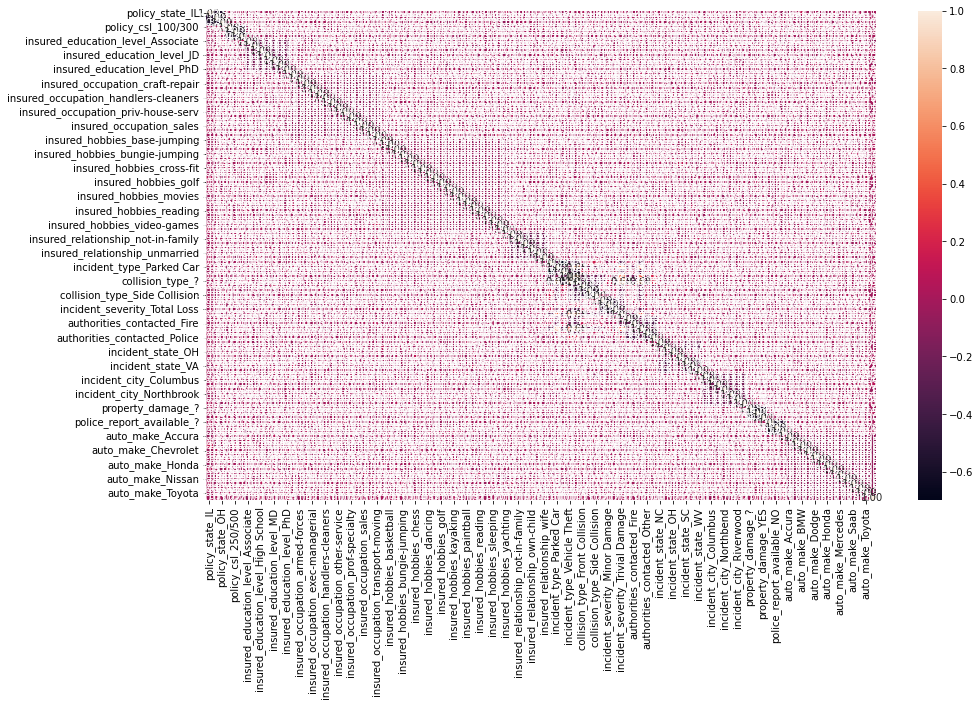

In [240]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df[ohe_cols].corr(),annot=True, fmt=".2f")

In [241]:
df.corr()[df.corr()<1].min().sort_values()

collision_type_?                         -0.838674
vehicle_claim                            -0.838674
total_claim_amount                       -0.834874
incident_type_Multi-vehicle Collision    -0.697725
incident_type_Single Vehicle Collision   -0.697725
                                            ...   
insured_hobbies_board-games              -0.062545
insured_hobbies_basketball               -0.060250
insured_hobbies_sleeping                 -0.058150
insured_hobbies_cross-fit                -0.057672
insured_hobbies_chess                    -0.057419
Length: 122, dtype: float64

In [242]:
df.corr()[df.corr()<1].max().sort_values()

bodily_injuries                          0.059699
auto_make_Toyota                         0.063647
capital-loss                             0.065668
insured_hobbies_cross-fit                0.065874
umbrella_limit                           0.067538
                                           ...   
months_as_customer                       0.922098
number_of_vehicles_involved              0.970146
incident_type_Multi-vehicle Collision    0.970146
vehicle_claim                            0.982773
total_claim_amount                       0.982773
Length: 122, dtype: float64

In [243]:
df.drop(columns=['total_claim_amount','number_of_vehicles_involved'],inplace=True)

In [244]:
df.corr()[df.corr()<1].max().sort_values()

bodily_injuries              0.059699
auto_make_Toyota             0.063647
capital-loss                 0.065668
insured_hobbies_cross-fit    0.065874
umbrella_limit               0.067538
                               ...   
injury_claim                 0.722878
property_claim               0.732090
vehicle_claim                0.732090
age                          0.922098
months_as_customer           0.922098
Length: 120, dtype: float64

In [245]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       ...
       'auto_make_Dodge', 'auto_make_Ford', 'auto_make_Honda',
       'auto_make_Jeep', 'auto_make_Mercedes', 'auto_make_Nissan',
       'auto_make_Saab', 'auto_make_Suburu', 'auto_make_Toyota',
       'auto_make_Volkswagen'],
      dtype='object', length=136)

In [246]:
# Drop columns for which we have already made dummy columns
#df.drop(columns=['policy_state','policy_csl','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model',],inplace=True)
df.drop(columns=['policy_state','policy_csl','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make'],inplace=True)

In [247]:
df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       ...
       'auto_make_Dodge', 'auto_make_Ford', 'auto_make_Honda',
       'auto_make_Jeep', 'auto_make_Mercedes', 'auto_make_Nissan',
       'auto_make_Saab', 'auto_make_Suburu', 'auto_make_Toyota',
       'auto_make_Volkswagen'],
      dtype='object', length=121)

In [248]:
# Create X with all independent variable
X=df.drop(columns=["fraud_reported"])
X

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,48,1000,1406.91,0,466132,1,53300,0,5,...,0,0,0,0,0,0,1,0,0,0
1,228,42,2000,1197.22,5000000,468176,1,0,0,8,...,0,0,0,0,1,0,0,0,0,0
2,134,29,2000,1413.14,5000000,430632,0,35100,0,7,...,1,0,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,608117,0,48900,-62400,5,...,0,0,0,0,0,0,0,0,0,0
4,228,44,1000,1583.91,6000000,610706,1,66000,-46000,20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,431289,0,0,0,20,...,0,0,1,0,0,0,0,0,0,0
996,285,41,1000,1436.79,0,608177,0,70900,0,23,...,0,0,0,0,0,0,0,0,0,1
997,130,34,500,1383.49,3000000,442797,0,35100,0,4,...,0,0,0,0,0,0,0,1,0,0
998,458,62,2000,1356.92,5000000,441714,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [249]:
# Create y with only target variable
y=df['fraud_reported']
y

0      Y
1      Y
2      N
3      Y
4      N
      ..
995    N
996    N
997    N
998    N
999    N
Name: fraud_reported, Length: 1000, dtype: object

In [250]:
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
60,inf,insured_hobbies_sleeping
76,inf,collision_type_Side Collision
88,inf,incident_state_OH
87,inf,incident_state_NY
86,inf,incident_state_NC
...,...,...
4,1.108710,umbrella_limit
11,1.106388,witnesses
2,1.106238,policy_deductable
6,1.092264,insured_sex


In [253]:
df.isna().sum()

months_as_customer       0
age                      0
policy_deductable        0
policy_annual_premium    0
umbrella_limit           0
                        ..
auto_make_Nissan         0
auto_make_Saab           0
auto_make_Suburu         0
auto_make_Toyota         0
auto_make_Volkswagen     0
Length: 121, dtype: int64

In [254]:
#As there are lots of columns we'll handle multicolliniarity by using PCA
pca = PCA()
#plot the graph to find the principal components
X_pca = pca.fit_transform(X)
X_pca

array([[-1.10104979e+06, -3.38587779e+04, -2.31464122e+03, ...,
         6.94673119e-10,  3.62375024e-10,  1.26420567e-10],
       [ 3.89899635e+06, -3.44539307e+04, -3.80996490e+04, ...,
         3.24114416e-10, -1.56825574e-10,  8.28024173e-11],
       [ 3.89894611e+06, -7.21132019e+04, -1.51099236e+04, ...,
        -4.10462388e-10, -6.65418633e-10,  5.84283651e-11],
       ...,
       [ 1.89894500e+06, -5.90736633e+04, -1.40129373e+04, ...,
        -2.43156895e-10, -5.48670883e-12,  3.19780503e-10],
       [ 3.89896896e+06, -6.12957117e+04, -3.71120125e+04, ...,
         1.65722740e-10, -5.76040620e-12, -6.94089443e-11],
       [-1.10091287e+06,  1.12627370e+05, -3.65371879e+04, ...,
        -9.61637437e-11,  1.26430501e-11, -3.92876579e-11]])

In [255]:
# Check the cumulative sum of variance ratio to decide on the acceptable loss in variance.
np.cumsum(pca.explained_variance_ratio_)

array([0.99865525, 0.99962818, 0.99978339, 0.99992392, 0.99999588,
       0.99999799, 0.99999992, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [256]:
# As we can see using 5 components the loss in variance is less than 10% so we'll use only 9 components.
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X)
X_pca

array([[-1.10104979e+06, -3.38587779e+04, -2.31464122e+03, ...,
         4.37437646e+03, -1.63837986e+02, -1.45666873e+02],
       [ 3.89899635e+06, -3.44539307e+04, -3.80996490e+04, ...,
        -1.46354339e+02,  8.92250599e+02,  5.26374244e+01],
       [ 3.89894611e+06, -7.21132019e+04, -1.51099236e+04, ...,
        -2.15216068e+03,  8.45665570e+02, -1.74769085e+02],
       ...,
       [ 1.89894500e+06, -5.90736633e+04, -1.40129373e+04, ...,
        -1.06188403e+03, -5.74399092e+02, -1.12572202e+02],
       [ 3.89896896e+06, -6.12957117e+04, -3.71120125e+04, ...,
        -8.83837791e+02,  9.32361257e+02, -9.07685533e+01],
       [-1.10091287e+06,  1.12627370e+05, -3.65371879e+04, ...,
         9.71981120e+01, -9.07472412e+01,  5.03257909e+02]])

### Model Building

In [257]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y, test_size=0.25, random_state=80)

In [258]:
X_train

array([[-1.10103546e+06, -5.50752026e+04,  5.56384213e+03, ...,
         6.95738266e+01, -1.27936023e+02, -1.97579694e+02],
       [-1.10098791e+06, -2.25295223e+04,  8.91826214e+03, ...,
         2.96472084e+03, -1.39636961e+02,  6.80780412e+01],
       [-1.10092978e+06,  1.03808821e+05, -3.51821809e+04, ...,
        -9.58529460e+02, -5.23782429e+01,  1.92757020e+02],
       ...,
       [-1.10099733e+06, -2.33021353e+04, -3.86065137e+04, ...,
        -1.42997910e+01, -5.94135735e+02, -4.14411664e+01],
       [-1.10091287e+06,  1.12627370e+05, -3.65371879e+04, ...,
         9.71981120e+01, -9.07472412e+01,  5.03257909e+02],
       [-1.10095834e+06,  1.14485087e+05,  8.32569390e+03, ...,
        -2.30977913e+03, -6.66675242e+02, -7.82386908e+00]])

In [259]:
X_test

array([[-1.10101439e+06, -2.29462264e+04,  4.01088477e+04, ...,
         4.78702300e+03,  7.89161482e+02, -1.28981199e+02],
       [-1.10100809e+06, -3.23474598e+04,  8.35798377e+03, ...,
         3.91224398e+03, -5.85361365e+02,  2.90095028e+02],
       [-1.10096050e+06,  1.19158954e+05,  6.88529597e+03, ...,
         9.97306886e+02,  7.81639750e+02,  1.57832792e+02],
       ...,
       [-1.10104369e+06, -4.57748270e+04,  5.05463694e+04, ...,
        -5.20843970e+02, -1.28080067e+02,  1.67412743e+02],
       [ 3.89896126e+06, -6.14915434e+04, -3.61292311e+04, ...,
         4.65952157e+03, -6.44659097e+02, -1.97205870e+02],
       [ 4.89907814e+06,  9.92032875e+04, -3.57511923e+04, ...,
        -4.59203701e+02,  8.97927662e+02,  1.00681382e+02]])

In [260]:
y_train

136    N
368    Y
855    N
178    N
886    N
      ..
810    N
171    Y
893    N
999    N
771    N
Name: fraud_reported, Length: 750, dtype: object

In [261]:
y_test

660    N
145    Y
412    N
619    N
625    N
      ..
601    N
132    N
191    N
251    Y
849    N
Name: fraud_reported, Length: 250, dtype: object

In [262]:
y_train.value_counts()

N    565
Y    185
Name: fraud_reported, dtype: int64

#### Class balancing of train data

In [263]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [264]:
X_train

array([[-1.10103546e+06, -5.50752026e+04,  5.56384213e+03, ...,
         6.95738266e+01, -1.27936023e+02, -1.97579694e+02],
       [-1.10098791e+06, -2.25295223e+04,  8.91826214e+03, ...,
         2.96472084e+03, -1.39636961e+02,  6.80780412e+01],
       [-1.10092978e+06,  1.03808821e+05, -3.51821809e+04, ...,
        -9.58529460e+02, -5.23782429e+01,  1.92757020e+02],
       ...,
       [-1.10106603e+06, -4.39016345e+04,  1.03280943e+04, ...,
         1.83455951e+03,  2.23747529e+02,  3.41367451e+02],
       [-1.10104516e+06, -4.21193248e+04,  3.00904987e+04, ...,
         2.96588595e+03, -5.97036746e+02,  1.26020581e+02],
       [-1.10099804e+06, -3.83709610e+04,  1.73038185e+04, ...,
        -6.69001516e+03,  6.96644370e+01,  3.67440701e+01]])

In [265]:
y_train.value_counts()

N    565
Y    565
Name: fraud_reported, dtype: int64

#### Logistic Regression

In [266]:
# Fit the Logistic Regression model
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [267]:
#Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array(['N', 'N', 'Y', ..., 'Y', 'N', 'Y'], dtype=object)

In [268]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.6106194690265486

In [269]:
#Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array(['N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y

In [270]:
# Print the confusion matrix which has the TruePositive, FalsePositive, FalseNegative and TrueNegative counts 
confusion_matrix(y_test,y_test_pred)

array([[ 84, 104],
       [ 22,  40]], dtype=int64)

In [271]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.496

#### Random Forest

In [272]:
# Fit the Random Forest Classifier model
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [273]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array(['N', 'Y', 'N', ..., 'Y', 'Y', 'Y'], dtype=object)

In [274]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

1.0

In [275]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array(['Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N',
       'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y

In [276]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[148,  40],
       [ 41,  21]], dtype=int64)

In [277]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.676

Logistic Regression model has low accuracy in train as well as test data. Random forest has better accuracy but its overfitting. Let's see if tuning the hyperparameter would reduce overfitting.

#### Hyperparameter tuning

In [326]:
# Hyperparameter tuning to maximize the accuracy on test data which would reduce the overfitting and will make the model generic and robust.
param_grid = {
    'bootstrap': [True],
    #'max_depth': [15, 17, 19],
    'max_depth': [15],
    #'min_samples_split': [1, 2, 3, 4, 5],
    'min_samples_split': [2],
    #'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1],
    #'max_features': [0.4, 0.5, 0.6],
    #'max_features': ["auto", "sqrt", "log2"],
    'max_features': ["auto"],
    #'n_estimators': [120, 140, 160],
    'n_estimators': [140]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 10)

In [327]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=140
[CV 1/5; 1/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=140;, score=nan total time=   0.0s
[CV 2/5; 1/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=140
[CV 2/5; 1/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=140;, score=nan total time=   0.0s
[CV 3/5; 1/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=140
[CV 3/5; 1/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=140;, score=nan total time=   0.0s
[CV 4/5; 1/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_l

[CV 4/5; 6/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=140;, score=nan total time=   0.0s
[CV 5/5; 6/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=140
[CV 5/5; 6/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=140;, score=nan total time=   0.0s
[CV 1/5; 7/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140
[CV 1/5; 7/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140;, score=0.712 total time=   0.6s
[CV 2/5; 7/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140
[CV 2/5; 7/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140;, score=0.730 tot

[CV 3/5; 12/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=140;, score=0.832 total time=   0.7s
[CV 4/5; 12/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=140
[CV 4/5; 12/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=140;, score=0.779 total time=   0.7s
[CV 5/5; 12/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=140
[CV 5/5; 12/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=140;, score=0.872 total time=   0.7s
[CV 1/5; 13/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=140
[CV 1/5; 13/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=140;, scor

[CV 2/5; 18/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=140;, score=0.712 total time=   0.7s
[CV 3/5; 18/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=140
[CV 3/5; 18/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=140;, score=0.819 total time=   0.7s
[CV 4/5; 18/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=140
[CV 4/5; 18/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=140;, score=0.810 total time=   0.7s
[CV 5/5; 18/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=140
[CV 5/5; 18/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=140;, scor

[CV 1/5; 24/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=140;, score=0.690 total time=   0.7s
[CV 2/5; 24/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=140
[CV 2/5; 24/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=140;, score=0.690 total time=   0.7s
[CV 3/5; 24/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=140
[CV 3/5; 24/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=140;, score=0.796 total time=   0.7s
[CV 4/5; 24/25] START bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=140
[CV 4/5; 24/25] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=140;, scor

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [15],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [140]},
             verbose=10)

In [329]:
best_params=grid_search.best_params_
print(best_params)

{'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 140}


In [330]:
#Fit the random forest classifier model
rf=RandomForestClassifier(**best_params)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=140)

In [331]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array(['N', 'Y', 'N', ..., 'Y', 'Y', 'Y'], dtype=object)

In [332]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

1.0

In [333]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array(['Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N',
       'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y

In [334]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[149,  39],
       [ 38,  24]], dtype=int64)

In [335]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.692

#### After doing hyperparameter tuning we can see test accuracy has slightly increased.

In [336]:
# Saving the best model
pickle.dump(rf, open('model_insurance_fraud_classification.pkl', 'wb'))